In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import psycopg2
import random
import seaborn as sns
import USC_dataframe_generation as usc

from importlib import reload

In [2]:
conn = psycopg2.connect(host='localhost', dbname='inventory', user='postgres', password='PSGAdmin')
curs = conn.cursor()
psycopg2.extensions.register_adapter(np.int64, psycopg2._psycopg.AsIs)

In [3]:
heh_cmd = pd.read_sql_query("""SELECT subs_id, sub.class_name, sub.preferred_name, casr_number, ec_number, index_number, 
                                ht."type", hc.classification, hn."name"
                                FROM heh h
                                left join substance sub on sub.id = h.subs_id
                                left join heh_type ht on ht.id = h.heh_type_id
                                left join heh_classification hc on hc.id = h.heh_classif_id
                                left join heh_name hn on hn.id = h.heh_name_id""", conn)

heh_df = pd.DataFrame(heh_cmd, dtype=object)

In [4]:
reg_cmd = pd.read_sql_query("""SELECT reg.id, reg.subs_id, sub.class_name, sub.preferred_name, rco.country, rt."type", rg.general_regulation_name, 
                            rspec.specific_regulation_name, rsub.subspecific_regulation_name, rsc.special_cases_name, addr.additional_information_name, 
                            cid."name", ct."type", regn.names
                            FROM regulations reg
                            LEFT JOIN substance sub ON sub.id = reg.subs_id
                            left join regulation_country rco on rco.id = reg.reg_country_id
                            left join regulation_type rt on rt.id = reg.reg_type_id
                            left join general_regulation rg on rg.id = reg.gen_reg_id
                            left join specific_regulation rspec on rspec.id = reg.spec_reg_id
                            LEFT JOIN subspecific_regulation rsub ON rsub.id = reg.subspec_reg_id
                            left join special_cases_regulation rsc on rsc.id = reg.special_cases_id
                            left join additional_information_regulation addr on addr.id = reg.additional_information_id
                            LEFT JOIN chem_id cid ON cid.chem_type_id = reg.chem_type_id
                            LEFT JOIN chem_type ct ON ct.id = cid.chem_type_id
                            LEFT JOIN regulation_names regn ON regn.id = reg.regulation_id
                            order by reg.id asc""", conn)

reg_df = pd.DataFrame(reg_cmd, dtype=object)

In [5]:
substances = reg_df.subs_id.unique()

In [6]:
names_regulations_cols = ['class_name','preferred_name','general_regulation_name','specific_regulation_name',
                          'subspecific_regulation_name','special_cases_name','additional_information_name','names']

In [7]:
cmr_positive = heh_df.loc[(heh_df['type'] == 'CMR') & (~heh_df['name'].isin(['YES','NO','No information','Pending (1)',
                                                                            '(Shall apply from 1 March 2018)',
                                                                            '(31/03/2017)',
                                                                            'Registry of current Harmonised Classification and Labelling intentions by France',
                                                                            'Submitted intention by Netherlands (18/11/2015)',
                                                                            'Submitted intention by Norway (03/10/2011)',
                                                                            'Submitted intention by Germany (22/02/2011)',
                                                                            'Submitted intention by Norway (24/06/2014)',
                                                                            'Amendment 2016/1179', 'Pending','particle diameter < 1 mm)',
                                                                            'Submitted intention by Italy (22/08/2012)',
                                                                            'Submitted intention by Sweden (14/11/2014)'])), 'name'].unique()
pbt_ann = heh_df.loc[(heh_df['type'] == 'PBT') & (~heh_df['name'].isin(['YES','NO','No information','Pending (2)'])), 'name'].unique()
vpvb_ann = heh_df.loc[(heh_df['type'] == 'vPvB') & (~heh_df['name'].isin(['NO','Pending (2)','YES','No information'])), 'name'].unique()
endoc_ann = heh_df.loc[(heh_df['type'] == 'Endocrine_disruptor') & (~heh_df['name'].isin(['YES','NO','Pending (3)','No information'])), 'name'].unique()
sens_ann = heh_df.loc[(heh_df['type'] == 'Sensitiser') & (~heh_df['name'].isin(['YES','NO','No information','(Shall apply from 1 March 2018)',
                                                                                'Pending (3)','Pending(3)','Submitted intention by Slovenia (09/01/2015)',
                                                                               'Submitted intention by United Kingdom (01/02/2017)',
                                                                               'Amendment 2016/1179','(05/01/2016)','particle diameter < 1 mm)',
                                                                               'Proposed future entry in Annex VI of CLP Regulation',
                                                                               'Registry of current Harmonised Classification and Labelling intentions by Norway',
                                                                               'Removal of','SCL ≥ 0.06 %'])), 'name'].unique()
other_ann = heh_df.loc[(heh_df['type'] == 'Other') & (~heh_df['name'].isin(['No information'])), 'name'].unique()

In [8]:
pbt_ann = np.array([str_.strip('(').strip(')') for str_ in pbt_ann])

In [9]:
vpvb_ann = np.array([str_.strip('(').strip(')') for str_ in vpvb_ann])

In [10]:
endoc_ann = np.array([str_.strip('(').strip(')') for str_ in endoc_ann])

In [11]:
# %%time
# cmr_dict = usc.generate_dataframe(substance_id_list=substances,endpoint='CMR', regulations_df=reg_df, endpoint_annotations=cmr_positive)

CPU times: user 11min 47s, sys: 131 ms, total: 11min 47s
Wall time: 11min 47s


In [12]:
# pbt_dict = usc.generate_dataframe(substance_id_list=substances,endpoint='PBT', regulations_df=reg_df, endpoint_annotations=pbt_ann)

In [13]:
# vpvb_dict = usc.generate_dataframe(substance_id_list=substances,endpoint='vPvB', regulations_df=reg_df, endpoint_annotations=vpvb_ann)

In [14]:
# endoc_dict = usc.generate_dataframe(substance_id_list=substances,endpoint='Endocrine_disruptor', regulations_df=reg_df, endpoint_annotations=endoc_ann)

In [15]:
# sens_dict = usc.generate_dataframe(substance_id_list=substances,endpoint='Sensitiser', regulations_df=reg_df, endpoint_annotations=sens_ann)

In [16]:
# other_dict = usc.generate_dataframe(substance_id_list=substances,endpoint='Other', regulations_df=reg_df, endpoint_annotations=other_ann)

In [17]:
# cmr_df = pd.DataFrame(data=cmr_dict)
# pbt_df = pd.DataFrame(data=pbt_dict)
# vpvb_df = pd.DataFrame(data=vpvb_dict)
# endoc_df = pd.DataFrame(data=endoc_dict)
# sens_df = pd.DataFrame(data=sens_dict)
# other_df = pd.DataFrame(data=other_dict)

In [18]:
# to_concat_df = [cmr_df, pbt_df, vpvb_df,endoc_df,sens_df]
# concat_df = pd.concat(to_concat_df)

In [19]:
# for subs_id in substances:
#     if other_df[(other_df['subs_id'] == subs_id) & (other_df['name'].isin(['NO','No information']))].empty:
#         other_df.loc[other_df['subs_id'] == subs_id,:] = other_df.loc[(other_df['subs_id'] == subs_id) & 
#                                                                       (~other_df['name'].isin(concat_df[concat_df['subs_id'] == subs_id].name.unique())),:]

In [20]:
# new_other_df = other_df.dropna().reset_index().drop(columns=['index'])

In [21]:
# final_to_concat =[concat_df, new_other_df]
# final_df = pd.concat(final_to_concat)
# sorted_concat_df = final_df.sort_values(by=['subs_id', 'endpoint_type']).reset_index().drop(columns=['index'])

In [22]:
# sorted_concat_df.to_pickle('generated_heh_df.pkl')

In [23]:
sorted_concat_df = pd.read_pickle('generated_heh_df.pkl')

In [24]:
sorted_concat_df.columns

Index(['subs_id', 'endpoint_type', 'regulation', 'name'], dtype='object')

### Comparing HEH from Excel with my own generated dataframe

In [25]:
comp_dict = usc.compare_heh_dataframes(heh_df, sorted_concat_df, substances)
comp_df = pd.DataFrame(data=comp_dict, dtype=object)
comp_df['%_recuperation'].mean()
comp_df['%_recuperation'].std()

21.857466737548144

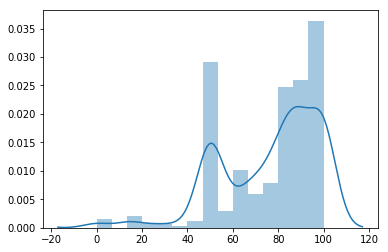

In [26]:
sns.distplot(sorted(comp_df['%_recuperation'].values))
# plt.savefig("all_data.png")

### Recuperation by endpoint

#### CMR

In [27]:
cmr_comp_dict = usc.compare_heh_dataframes(heh_df, sorted_concat_df, substances, 'CMR')
cmr_comp_df = pd.DataFrame(data=cmr_comp_dict, dtype=object)
print(cmr_comp_df['%_recuperation'].mean())
print(cmr_comp_df['%_recuperation'].std())

77.87821323219553
41.2048021464935


In the case where there are lower recuperation rates (<= 60) is it because there are strings describing certain rules that don't appear in the current regulations, then I'm not capturing them.

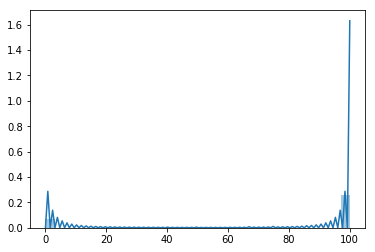

In [28]:
sns.distplot(sorted(cmr_comp_df['%_recuperation'].values))
# plt.savefig("cmr_data.png")

#### PBT

In [29]:
pbt_comp_dict = usc.compare_heh_dataframes(heh_df, sorted_concat_df, substances, 'PBT')
pbt_comp_df = pd.DataFrame(data=pbt_comp_dict, dtype=object)
print(pbt_comp_df['%_recuperation'].mean())
print(pbt_comp_df['%_recuperation'].std())

32.610619469026545
46.82854799691104


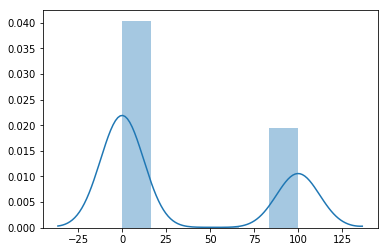

In [30]:
sns.distplot(sorted(pbt_comp_df['%_recuperation'].values))
# plt.savefig("pbt_data.png")

#### vPvB

In [31]:
vpvb_comp_dict = usc.compare_heh_dataframes(heh_df, sorted_concat_df, substances, 'vPvB')
vpvb_comp_df = pd.DataFrame(data=vpvb_comp_dict, dtype=object)
print(vpvb_comp_df['%_recuperation'].mean())
print(vpvb_comp_df['%_recuperation'].std())

32.256637168141594
46.695455054880014


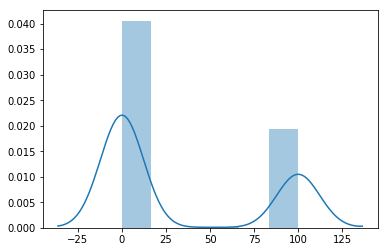

In [32]:
sns.distplot(sorted(vpvb_comp_df['%_recuperation'].values))
# plt.savefig("vpvb_data.png")

#### Endocrine disruptor

In [33]:
endoc_comp_dict = usc.compare_heh_dataframes(heh_df, sorted_concat_df, substances, 'Endocrine_disruptor')
endoc_comp_df = pd.DataFrame(data=endoc_comp_dict, dtype=object)
print(endoc_comp_df['%_recuperation'].mean())
print(endoc_comp_df['%_recuperation'].std())

88.64306784660766
31.680725572906674


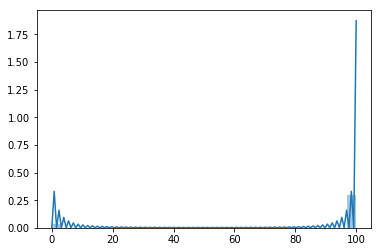

In [34]:
sns.distplot(sorted(endoc_comp_df['%_recuperation'].values))
plt.savefig("endoc_data.png")

#### Sensitiser

In [35]:
sens_comp_dict = usc.compare_heh_dataframes(heh_df, sorted_concat_df, substances, 'Sensitiser')
sens_comp_df = pd.DataFrame(data=sens_comp_dict, dtype=object)
print(sens_comp_df['%_recuperation'].mean())
print(sens_comp_df['%_recuperation'].std())

78.27096502317742
41.0065662869091


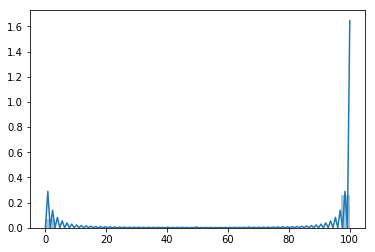

In [36]:
sns.distplot(sorted(sens_comp_df['%_recuperation'].values))
# plt.savefig("sens_data.png")

#### Other

In [37]:
other_comp_dict = usc.compare_heh_dataframes(heh_df, sorted_concat_df, substances, 'Other')
other_comp_df = pd.DataFrame(data=other_comp_dict, dtype=object)
print(other_comp_df['%_recuperation'].mean())
print(other_comp_df['%_recuperation'].std())

92.06462054776736
20.467068817768595


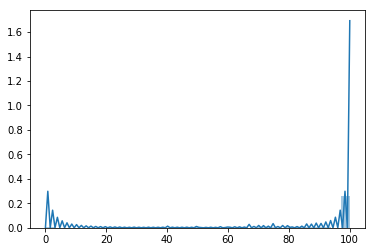

In [38]:
sns.distplot(sorted(other_comp_df['%_recuperation'].values))
# plt.savefig("other_data.png")

In [39]:
# with pd.ExcelWriter('USC_workflow_recuperation.xlsx', mode='wa') as writer:
#     cmr_comp_df.to_excel(writer, sheet_name='CMR')
#     pbt_comp_df.to_excel(writer, sheet_name='PBT')
#     vpvb_comp_df.to_excel(writer, sheet_name='vPvB')
#     endoc_comp_df.to_excel(writer, sheet_name='Endocrine_disruptor')
#     sens_comp_df.to_excel(writer, sheet_name='Sensitiser')
#     other_comp_df.to_excel(writer, sheet_name='Other')

### 1. Are there any old annotations that are being captured? If so, how many?
Yes there are. In fact most of them are being captured by our algorithm and those that aren't is because there are strings in HEH CII dataframe describing certain rules that don't appear in CII regulations part.

In [40]:
old_annotations = comp_df.heh_excel_annotation_number.sum()
new_annotations = comp_df.heh_generated_annotation_number.sum()
shared_annotations = comp_df.shared_annotations.sum()

In [41]:
print(old_annotations, new_annotations,shared_annotations)

8506 6919 6474


In [42]:
old_cmr = cmr_comp_df.heh_excel_annotation_number.sum()
new_cmr = cmr_comp_df.heh_generated_annotation_number.sum()
cmr_shared = cmr_comp_df.shared_annotations.sum()

In [43]:
print(old_cmr, new_cmr, cmr_shared)

1567 1555 1148


In [44]:
old_pbt = pbt_comp_df.heh_excel_annotation_number.sum()
new_pbt = pbt_comp_df.heh_generated_annotation_number.sum()
pbt_shared = pbt_comp_df.shared_annotations.sum()

In [45]:
print(old_pbt, new_pbt, pbt_shared)

1187 1130 363


In [46]:
old_vpvb = vpvb_comp_df.heh_excel_annotation_number.sum()
new_vpvb = vpvb_comp_df.heh_generated_annotation_number.sum()
vpvb_shared = vpvb_comp_df.shared_annotations.sum()

In [47]:
print(old_vpvb,new_vpvb,vpvb_shared)

1128 1130 359


In [48]:
old_endoc = endoc_comp_df.heh_excel_annotation_number.sum()
new_endoc = endoc_comp_df.heh_generated_annotation_number.sum()
endoc_shared = endoc_comp_df.shared_annotations.sum()

In [49]:
print(old_endoc,new_endoc,endoc_shared)

1253 1130 996


In [50]:
old_sens = sens_comp_df.heh_excel_annotation_number.sum()
new_sens = sens_comp_df.heh_generated_annotation_number.sum()
sens_shared = sens_comp_df.shared_annotations.sum()

In [51]:
print(old_sens,new_sens,sens_shared)

1415 1415 1002


In [52]:
old_other = other_comp_df.heh_excel_annotation_number.sum()
new_other = other_comp_df.heh_generated_annotation_number.sum()
other_shared = other_comp_df.shared_annotations.sum()

In [53]:
print(old_other,new_other,other_shared)

5194 4694 4516


In [54]:
whole_dict_comp = usc.compare_unique_annotations_dataframes(heh_df, sorted_concat_df)
cmr_dict_comp = usc.compare_unique_annotations_dataframes(heh_df, sorted_concat_df, 'CMR')
pbt_dict_comp = usc.compare_unique_annotations_dataframes(heh_df, sorted_concat_df, 'PBT')
vpvb_dict_comp = usc.compare_unique_annotations_dataframes(heh_df, sorted_concat_df, 'vPvB')
endoc_dict_comp = usc.compare_unique_annotations_dataframes(heh_df, sorted_concat_df, 'Endocrine_disruptor')
sens_dict_comp = usc.compare_unique_annotations_dataframes(heh_df, sorted_concat_df, 'Sensitiser')
other_dict_comp = usc.compare_unique_annotations_dataframes(heh_df, sorted_concat_df, 'Other')

In [55]:
whole_df_comp = pd.DataFrame(data=whole_dict_comp)
cmr_df_comp = pd.DataFrame(data=cmr_dict_comp)
pbt_df_comp = pd.DataFrame(data=pbt_dict_comp)
vpvb_df_comp = pd.DataFrame(data=vpvb_dict_comp)
endoc_df_comp = pd.DataFrame(data=endoc_dict_comp)
sens_df_comp = pd.DataFrame(data=sens_dict_comp)
other_df_comp = pd.DataFrame(data=other_dict_comp)

In [56]:
concated_comp_df = pd.concat([whole_df_comp,cmr_df_comp,pbt_df_comp,vpvb_df_comp,endoc_df_comp,sens_df_comp,other_df_comp])
concated_comp_df

,dataframe,heh_excel_annotation_number,heh_generated_annotation_number,shared_annotations,%_recuperation,non_shared_old_annotations,old_annotations_not_captured,non_shared_new_annotations,new_annotations
0,whole_dataframe,419,222,219,52.983294,200,"Acute Tox. 4, H302,, Aquatic Chronic 1,, Eye I...",3,"Pending (3b), Pending (3c), Pending (3a)"
0,CMR_dataframe,42,15,12,35.714286,30,"Carcinogenicity, Amendment 2016/1179, Submitte...",3,"Pending (3b), Pending (3c), Pending (3a)"
0,PBT_dataframe,5,1,1,20.000000,4,"Pending (2), (POPs Regulation), No information...",0,None
0,vPvB_dataframe,5,1,1,20.000000,4,"Pending (2), (POPs Regulation), No information...",0,None
0,Endocrine_disruptor_dataframe,6,1,1,16.666667,5,(Biocidal and Phytosanitary Regulations - CMR ...,0,None
0,Sensitiser_dataframe,28,10,7,35.714286,21,"Amendment 2016/1179, Skin Sens. 1A, H317, Skin...",3,"Pending (3b), Pending (3c), Pending (3a)"
0,Other_dataframe,369,208,208,56.368564,161,"Acute Tox. 4, H302,, Aquatic Chronic 1,, Eye I...",0,None


In [57]:
# with pd.ExcelWriter('USC_workflow_recuperation.xlsx', mode='a') as writer:
#      concated_comp_df.to_excel(writer, sheet_name='Whole_datasets')

#### Small sample with specific compounds and annotations comparison

In [58]:
# print(random.sample(range(len(substances)), 10))

In [59]:
substances_id_to_use = [689, 171, 820, 126, 418, 883, 781, 455, 365, 19]
substances_id_to_use = sorted(substances_id_to_use)

In [60]:
small_comp_dict = usc.compare_heh_dataframes(heh_df, sorted_concat_df, substances_id_to_use)

In [61]:
small_comp_df = pd.DataFrame(data=small_comp_dict, dtype=object)

In [62]:
# with pd.ExcelWriter('Small_set_USC_workflow.xlsx', mode='w') as writer:
#      small_comp_df.to_excel(writer)

In [63]:
small_cmr_dict = usc.compare_heh_dataframes(heh_df, sorted_concat_df, substances_id_to_use, 'CMR')
small_cmr_df = pd.DataFrame(data=small_cmr_dict, dtype=object)

### Confusion matrix endpoints

In [64]:
small_conf_cmr = usc.confusion_matrix_subs(heh_df, sorted_concat_df, substances_id_to_use, 'CMR')
small_conf_pbt = usc.confusion_matrix_subs(heh_df, sorted_concat_df, substances_id_to_use, 'PBT')
small_conf_vpvb = usc.confusion_matrix_subs(heh_df, sorted_concat_df, substances_id_to_use, 'vPvB')
small_conf_endoc = usc.confusion_matrix_subs(heh_df, sorted_concat_df, substances_id_to_use, 'Endocrine_disruptor')
small_conf_sens = usc.confusion_matrix_subs(heh_df, sorted_concat_df, substances_id_to_use, 'Sensitiser')
small_conf_other = usc.confusion_matrix_subs(heh_df, sorted_concat_df, substances_id_to_use, 'Other')

In [65]:
small_conf_cmr_df = pd.DataFrame(data=small_conf_cmr, dtype=object)

In [66]:
small_conf_cmr_df

,subs_id,Anotacion_en_inventario,Anotacion_generada,Anotacion_no_presente_en_inventario,Anotacion_no_generada,Anotaciones_compartidas
0,19,4,1,1,4,0
1,126,2,2,1,1,1
2,171,1,1,0,0,1
3,365,1,1,0,0,1
4,418,1,1,0,0,1
5,455,2,4,2,0,2
6,689,1,1,0,0,1
7,781,1,1,1,1,0
8,820,2,2,1,1,1
9,883,1,1,1,1,0


In [67]:
all_endpoints_mat_dict = usc.confusion_matrix_subs(heh_df, sorted_concat_df)
all_endpoints_df = pd.DataFrame(data=all_endpoints_mat_dict, dtype=object)

In [68]:
all_endpoints_df

,Endpoint,Anotaciones_en_inventario,Anotaciones_generadas,Anotaciones_no_presente_en_inventario,Anotaciones_no_generadas,Anotaciones_compartidas
0,CMR,42,15,3,30,12
1,PBT,5,1,0,4,1
2,vPvB,5,1,0,4,1
3,Endocrine_disruptor,6,1,0,5,1
4,Sensitiser,28,10,3,21,7
5,Other,369,208,0,161,208


In [69]:
reload(usc)

<module 'USC_dataframe_generation' from '/home/emarch/Documents/Inditex/USC_workflow_reproduction/USC_dataframe_generation.py'>

In [70]:
new_small_cmr = usc.confusion_matrix_pos_neg(heh_df, sorted_concat_df, substances_id_to_use, 'CMR')
new_small_pbt = usc.confusion_matrix_pos_neg(heh_df, sorted_concat_df, substances_id_to_use, 'PBT')
new_small_vpvb = usc.confusion_matrix_pos_neg(heh_df, sorted_concat_df, substances_id_to_use, 'vPvB')
new_small_endoc = usc.confusion_matrix_pos_neg(heh_df, sorted_concat_df, substances_id_to_use, 'Endocrine_disruptor')
new_small_sens = usc.confusion_matrix_pos_neg(heh_df, sorted_concat_df, substances_id_to_use, 'Sensitiser')
# new_small_other = usc.confusion_matrix_pos_neg(heh_df, sorted_concat_df, substances_id_to_use, 'Other')

In [71]:
new_small_cmr_df = pd.DataFrame(data=new_small_cmr, dtype=object)
new_small_pbt_df = pd.DataFrame(data=new_small_pbt, dtype=object)
new_small_vpvb_df = pd.DataFrame(data=new_small_vpvb, dtype=object)
new_small_endoc_df = pd.DataFrame(data=new_small_endoc, dtype=object)
new_small_sens_df = pd.DataFrame(data=new_small_sens, dtype=object)
# new_small_other_df = pd.DataFrame(data=new_small_other, dtype=object)

In [72]:
# new_small_concat = pd.concat([new_small_cmr_df,new_small_pbt_df,new_small_vpvb_df,new_small_endoc_df,new_small_sens_df])

In [73]:
# with pd.ExcelWriter('small_set_new_table.xlsx', mode='wa') as writer:
#     new_small_cmr_df.to_excel(writer, sheet_name='CMR')
#     new_small_pbt_df.to_excel(writer, sheet_name='PBT')
#     new_small_vpvb_df.to_excel(writer, sheet_name='vPvB')
#     new_small_endoc_df.to_excel(writer, sheet_name='Endocrine_disruptor')
#     new_small_sens_df.to_excel(writer, sheet_name='Sensitiser')

In [74]:
endpoint_list = ['CMR','PBT','vPvB','Endocrine_disruptor','Sensitiser','Other']

In [75]:
ann_info_list = ['YES','NO','No information','Pending', 'Pending (1)','Pending (2)',
                    'Pending (3)', 'Pending (3a)','Pending (3b)','Pending (3c)','Pending (4)']

In [76]:
for ep in endpoint_list:
    ep_dict = {'Anotaciones':[],'Inventario':[],'Generadas':[]}
    for ann in ann_info_list:
        total_original = heh_df.loc[(heh_df['type'] == ep) & (heh_df['name'] == ann),'name'].count()
        total_generadas = sorted_concat_df.loc[(sorted_concat_df['endpoint_type'] == ep) & (sorted_concat_df['name'] == ann),'name'].count()
        ep_dict['Anotaciones'].append(ann)
        ep_dict['Inventario'].append(total_original)
        ep_dict['Generadas'].append(total_generadas)
    
    ep_df = pd.DataFrame(data=ep_dict,dtype=object)
    ep_df.set_index('Anotaciones')
#     if os.path.isfile('Comparación_anotaciones.xlsx'):
#         with pd.ExcelWriter('Comparación_anotaciones.xlsx', mode='a') as writer:
#              ep_df.to_excel(writer, sheet_name=ep)
#     else:
#         with pd.ExcelWriter('Comparación_anotaciones.xlsx', mode='w') as writer:
#              ep_df.to_excel(writer, sheet_name=ep)

#### Small HEH Df to send it to Mark Cronin

In [77]:
list_of_subs_id = [1096, 326, 138, 259, 477, 541, 875, 968, 1060, 382]

In [78]:
selected_subs = heh_df.loc[heh_df['subs_id'].isin(list_of_subs_id),['preferred_name','type','classification','name']]

In [79]:
mc_df = pd.read_excel('muestra_mark_cronin.xlsx', dtype=object)

In [80]:
names_mc = mc_df.Compounds.apply(lambda x: x.strip()).unique()

In [81]:
mc_subs_cas = mc_df.CAS.apply(lambda x: x.strip('\n').strip()).unique()

In [82]:
names_heh_mc = heh_df.loc[heh_df['preferred_name'].isin(names_mc), 'name'].unique()

In [83]:
mc_subs_cas

array(['75-35-4', '1321-64-8', '3846-71-7', '66455-15-0', '68584-22-5',
       '50-00-0', '69011-36-5', '13573-18-7', '108-05-4'], dtype=object)

In [84]:
input_reg = ['CLP','SVHC', 'Harmonized C&L', 'Registration dossier (REACH)','Notification (CLP)','Ammendment (CLP-draft)','SVHC draft (Submitted/Withdrawn)']